ユニークユーザ数： 100000
ユニーク地点数： 34032
データフレーム全体のメモリ使用量: 11489993369


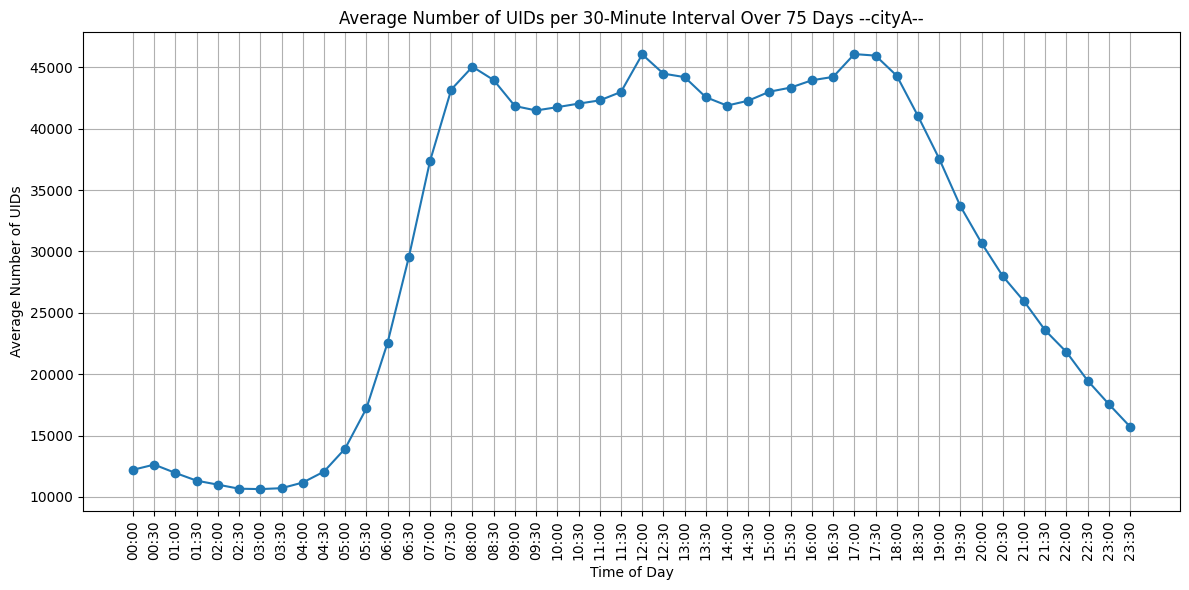

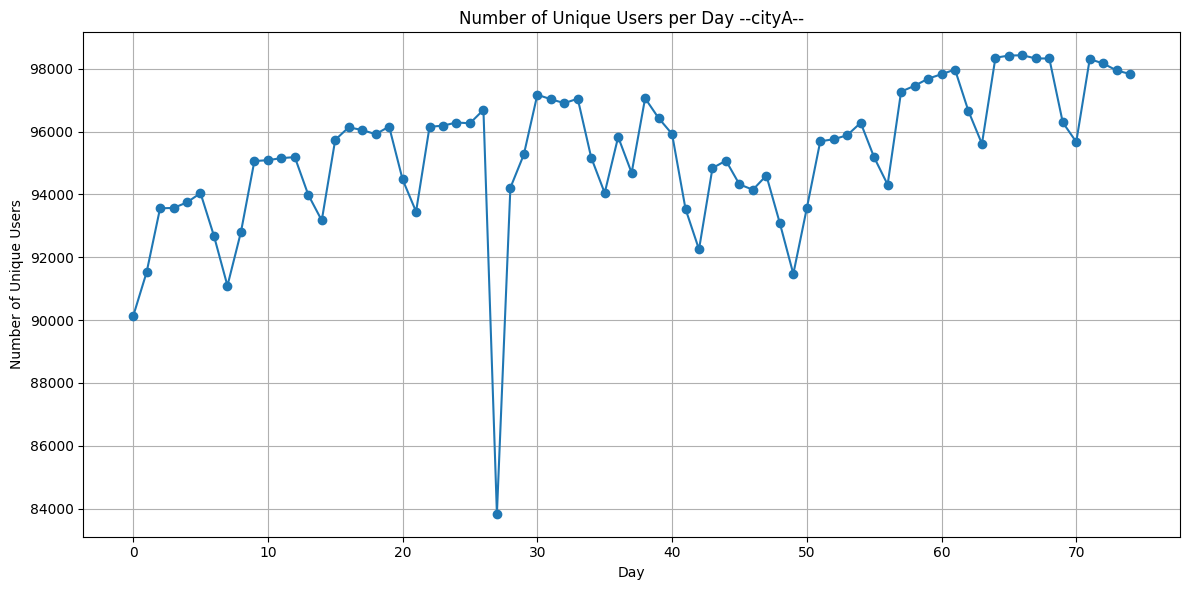

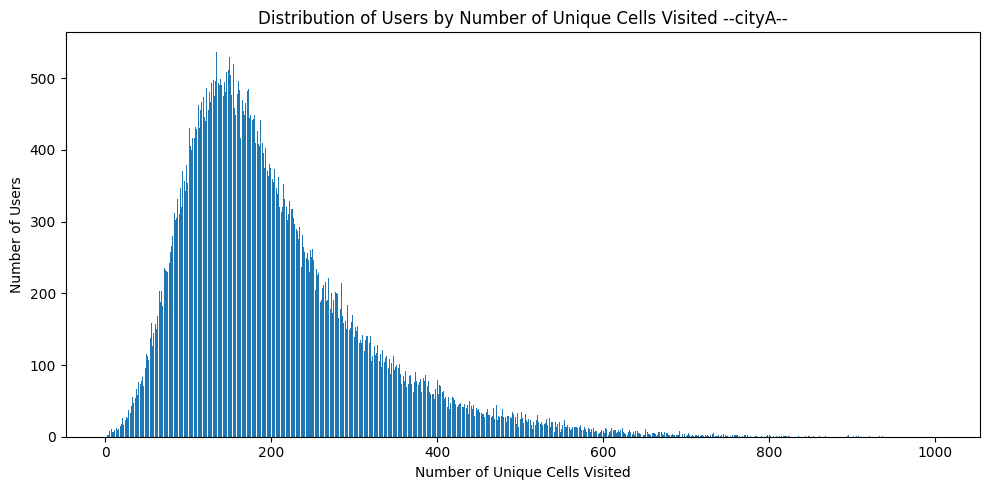

ユニークユーザ数： 25000
ユニーク地点数： 26524
データフレーム全体のメモリ使用量: 2501386976


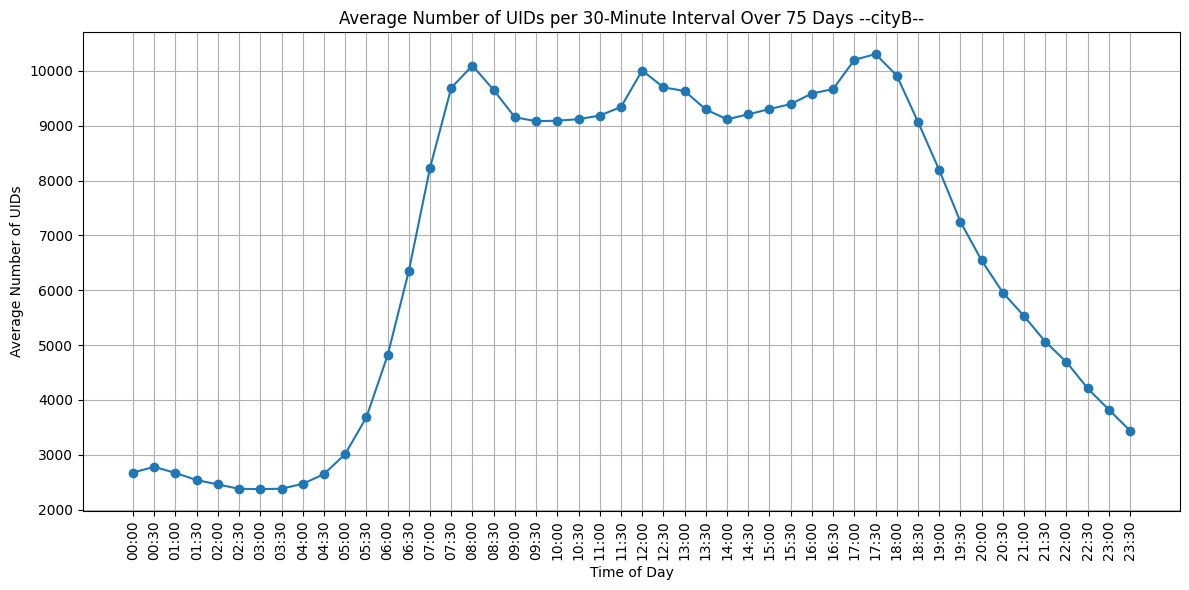

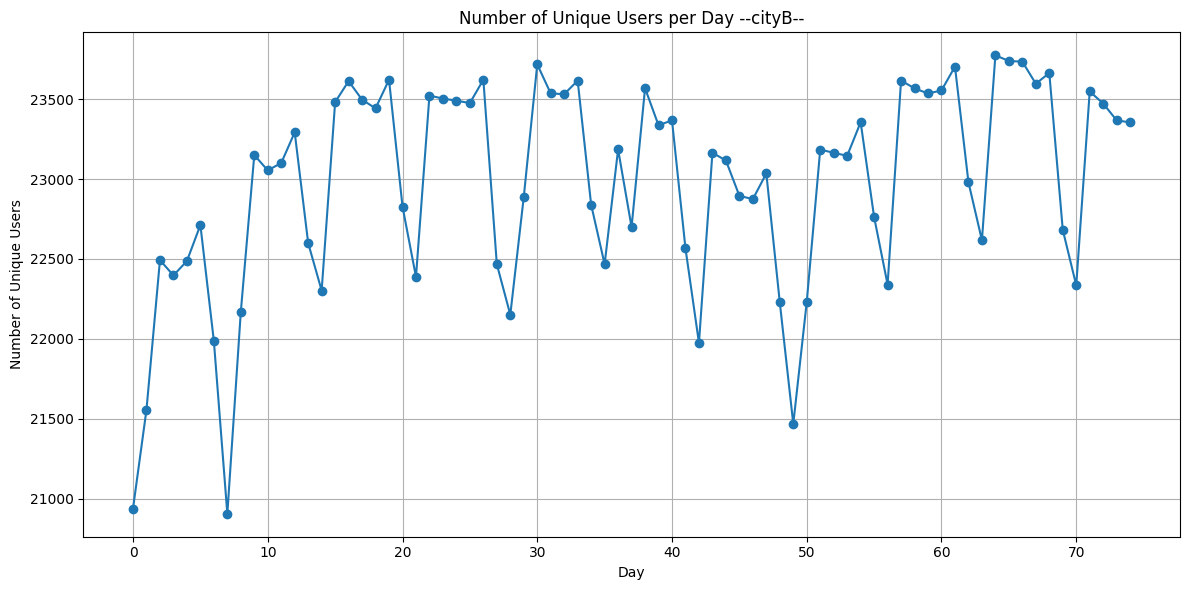

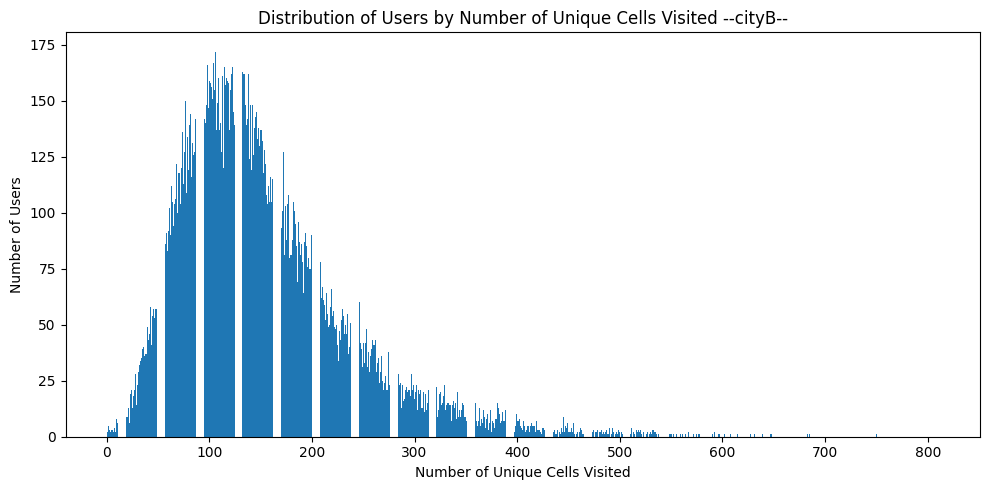

ユニークユーザ数： 20000
ユニーク地点数： 9209
データフレーム全体のメモリ使用量: 1899379249


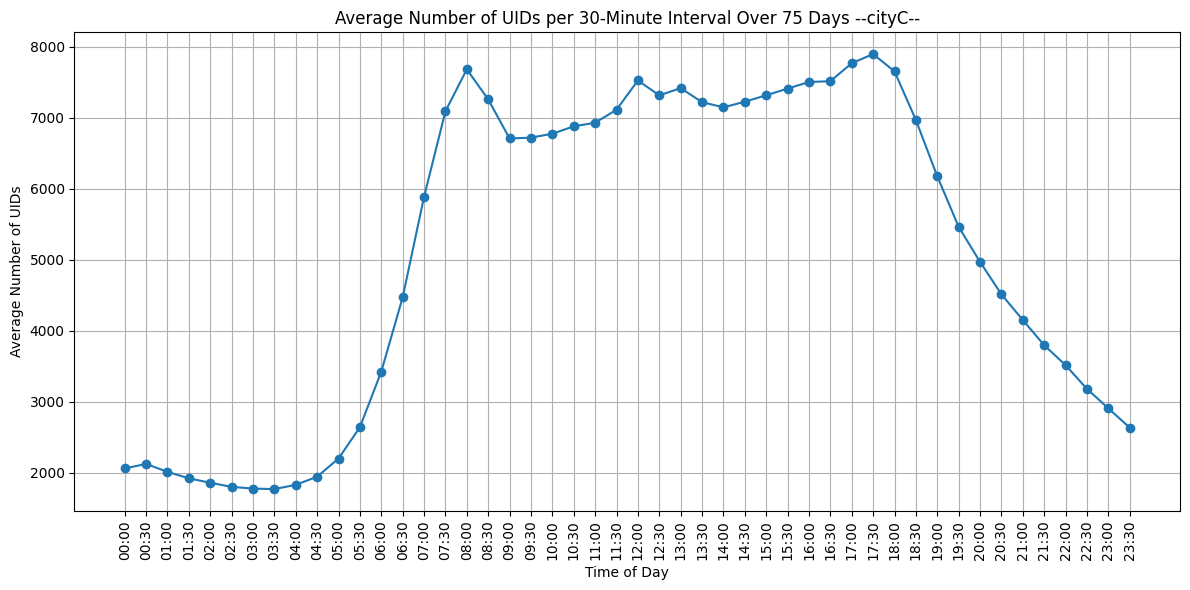

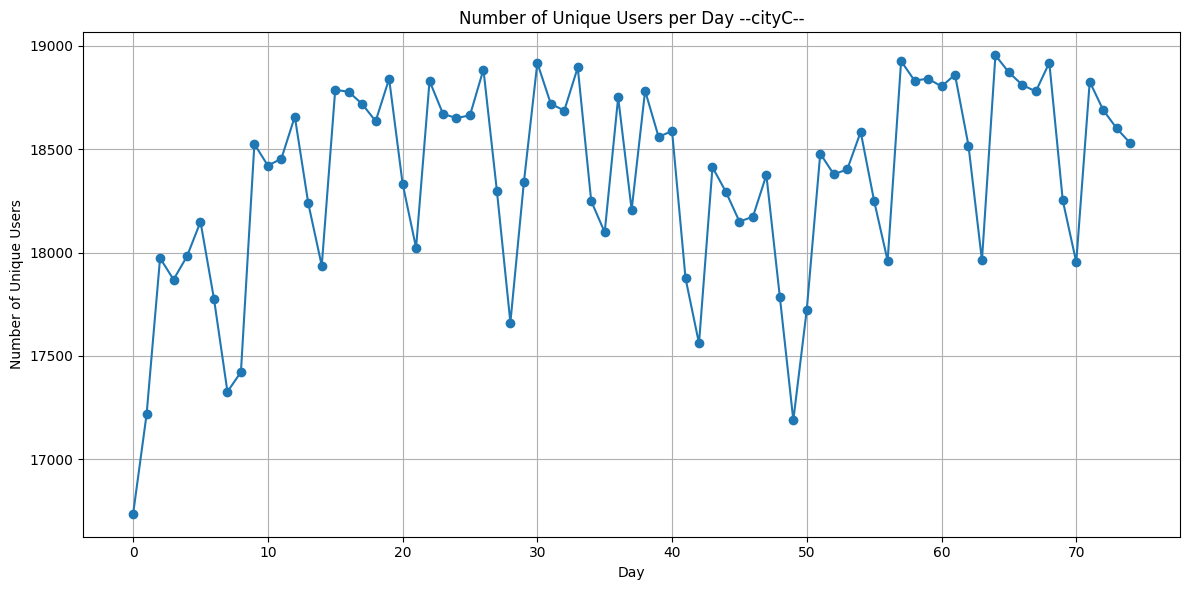

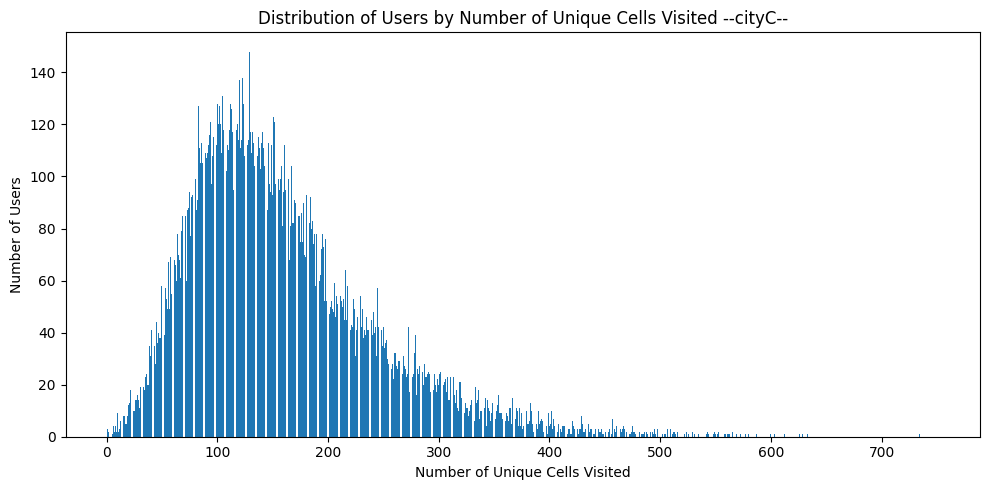

ユニークユーザ数： 6000
ユニーク地点数： 21114
データフレーム全体のメモリ使用量: 868205479


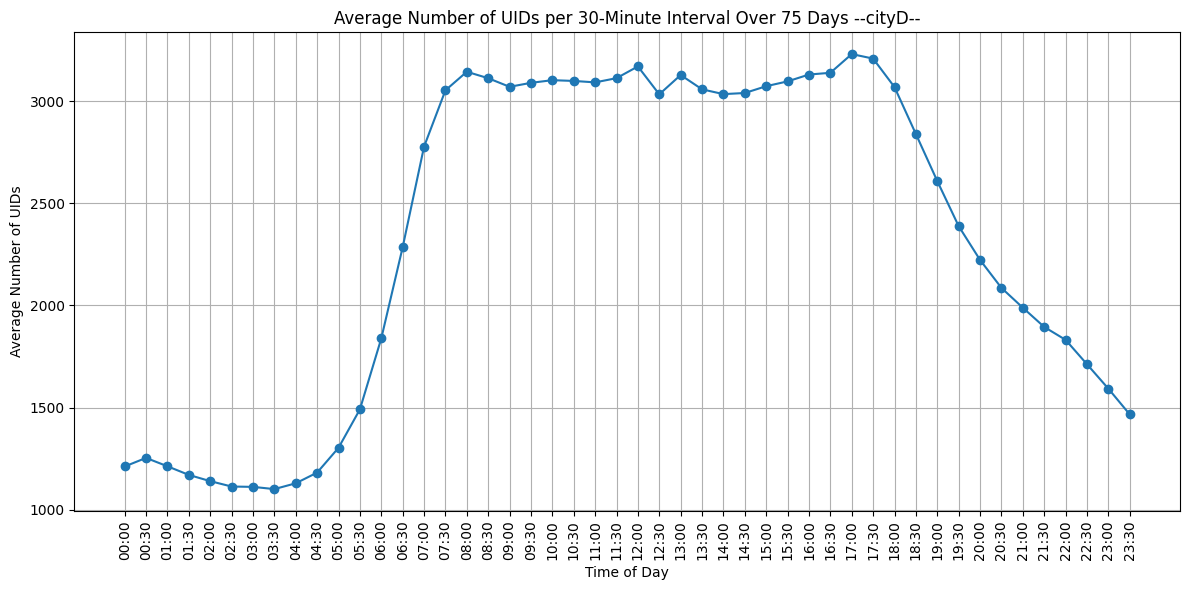

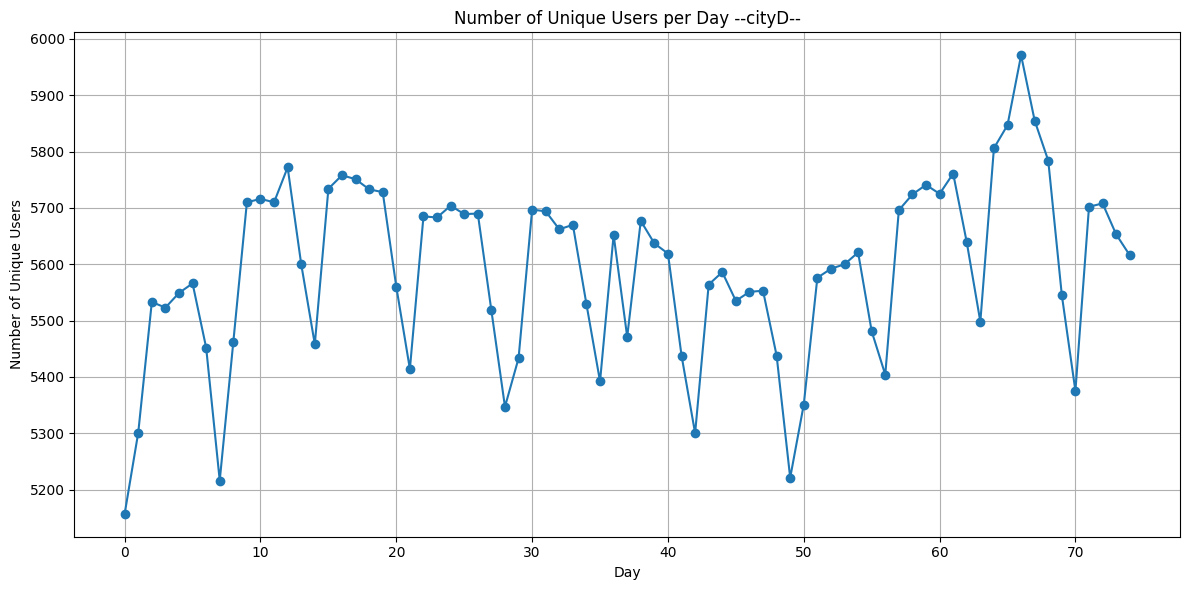

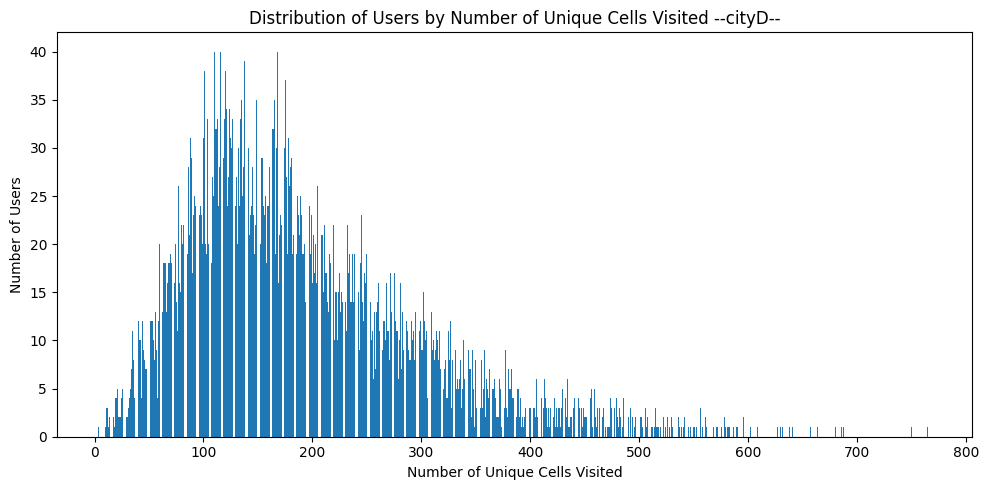

In [8]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd
import polars as pl

def read_gzip_csv(gzip_path):
    """
    gzip形式のCSVファイルを読み込む
    
    :param gzip_path: gzip圧縮されたCSVファイルのパス
    :return: pandasのデータフレーム
    """

    # Daskデータフレームとして読み込む
    # ddf = dd.read_csv(gzip_path, compression='gzip')
    # df= ddf.compute()
    
    with gzip.open(gzip_path, 'rt') as f:
        # df = pd.read_csv(f)
        df = pl.read_csv(f)

    # Pandasデータフレームに変換
    pandas_df = df.to_pandas()
    
    return pandas_df

def visualize_day_activity(df, city_name):
    # 各時間帯ごとのuid数をカウント
    grouped = df.groupby(['d', 't']).uid.nunique().reset_index()
    grouped_avg = grouped.groupby('t').uid.mean().reset_index()
    
    # プロット
    plt.figure(figsize=(12, 6))
    plt.plot(grouped_avg['t'], grouped_avg['uid'], marker='o')
    plt.xticks(range(48), [f'{i//2:02}:{(i%2)*30:02}' for i in range(48)], rotation=90)
    plt.xlabel('Time of Day')
    plt.ylabel('Average Number of UIDs')
    plt.title(f'Average Number of UIDs per 30-Minute Interval Over 75 Days --{city_name}--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def visualize_allday_activity(df, city_name):
    # 各日ごとのユニークユーザ数をカウント
    daily_unique_users = df.groupby('d').uid.nunique().reset_index()
    
    # プロット
    plt.figure(figsize=(12, 6))
    plt.plot(daily_unique_users['d'], daily_unique_users['uid'], marker='o')
    plt.xlabel('Day')
    plt.ylabel('Number of Unique Users')
    plt.title(f'Number of Unique Users per Day --{city_name}--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def visualize_cell_visited(df, city_name):   
    # 各uidで訪れたユニークな地点の数を計算
    unique_cells_per_uid = df.groupby('uid').z.nunique().reset_index()
    unique_cells_per_uid.columns = ['uid', 'unique_cells']
    
    # ユニークな地点数ごとのユーザー数をカウント
    users_per_unique_cells = unique_cells_per_uid.groupby('unique_cells').uid.count().reset_index()
    users_per_unique_cells.columns = ['unique_cells', 'user_count']
    
    # プロット
    plt.figure(figsize=(10, 5))
    plt.bar(users_per_unique_cells['unique_cells'], users_per_unique_cells['user_count'])
    plt.xlabel('Number of Unique Cells Visited')
    plt.ylabel('Number of Users')
    plt.title(f'Distribution of Users by Number of Unique Cells Visited --{city_name}--')
    plt.tight_layout()
    plt.show()

def visualize_data(city_name):

    if city_name == 'cityA':
        gzip_path = f'HuMob_Data/{city_name}_groundtruthdata.csv.gz'
    else:
        gzip_path = f'HuMob_Data/{city_name}_challengedata.csv.gz'
        
    # データの読み取り
    df = read_gzip_csv(gzip_path)

    # xとyの組み合わせをz列に格納
    # df['z'] = df.apply(lambda row: f"{row['x']}_{row['y']}", axis=1)
    df['z'] = df['x'].astype(str) + '_' + df['y'].astype(str)

    # ユニークユーザ数
    print('ユニークユーザ数：', len(df.uid.unique()))
    
    # ユニーク地点数
    print('ユニーク地点数：', len(df.z.unique()))

    # データフレーム全体のメモリ使用量を表示
    # データフレーム全体のメモリ使用量をバイト単位で取得
    memory_usage_bytes = df.memory_usage(deep=True).sum()
    
    # バイトをギガバイトに変換
    memory_usage_gb = memory_usage_bytes / (1024 ** 3)
    
    print(f'データフレーム全体のメモリ使用量: {memory_usage_gb:.6f} GB')
    
    visualize_day_activity(df, city_name)
    visualize_allday_activity(df, city_name)
    visualize_cell_visited(df, city_name)

city_label = ['cityA', 'cityB', 'cityC', 'cityD']

for city_name in city_label:
    visualize_data(city_name)

ユニークユーザ数： 25000
ユニーク地点数： 26524
データフレーム全体のメモリ使用量: 2.329598 GB


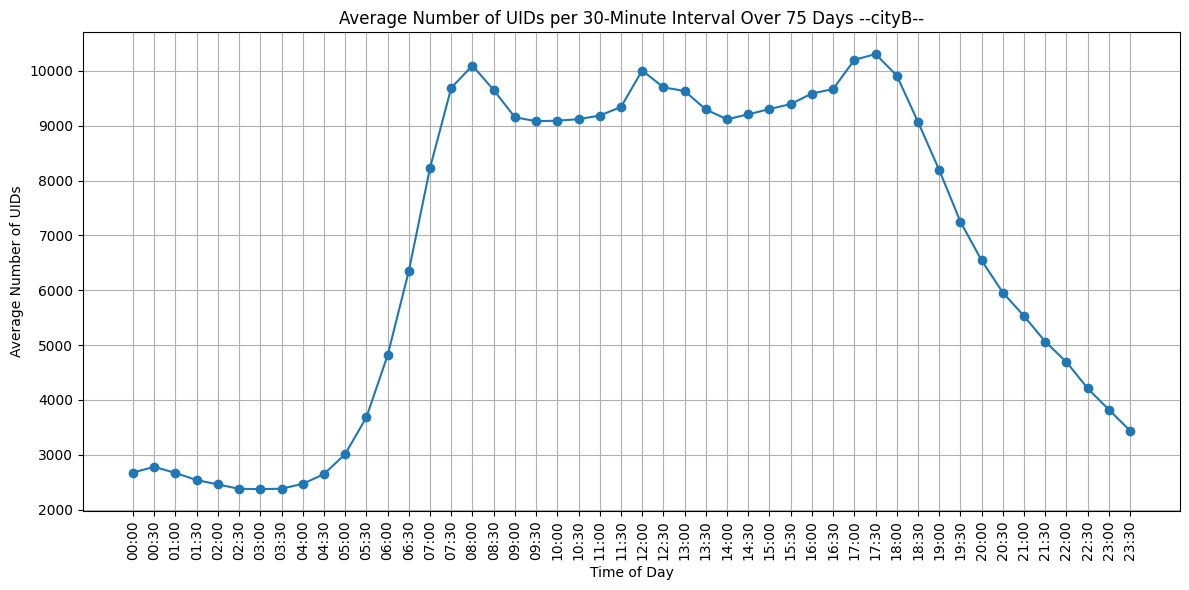

ユニークユーザ数： 20000
ユニーク地点数： 9209
データフレーム全体のメモリ使用量: 1.768935 GB


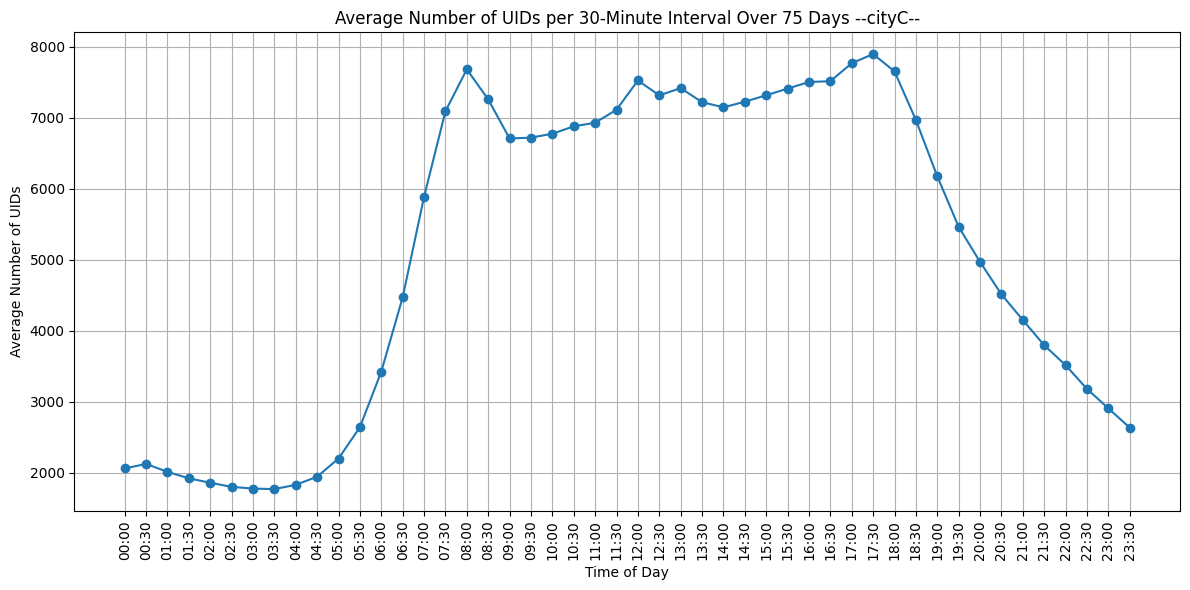

ユニークユーザ数： 6000
ユニーク地点数： 21114
データフレーム全体のメモリ使用量: 0.808579 GB


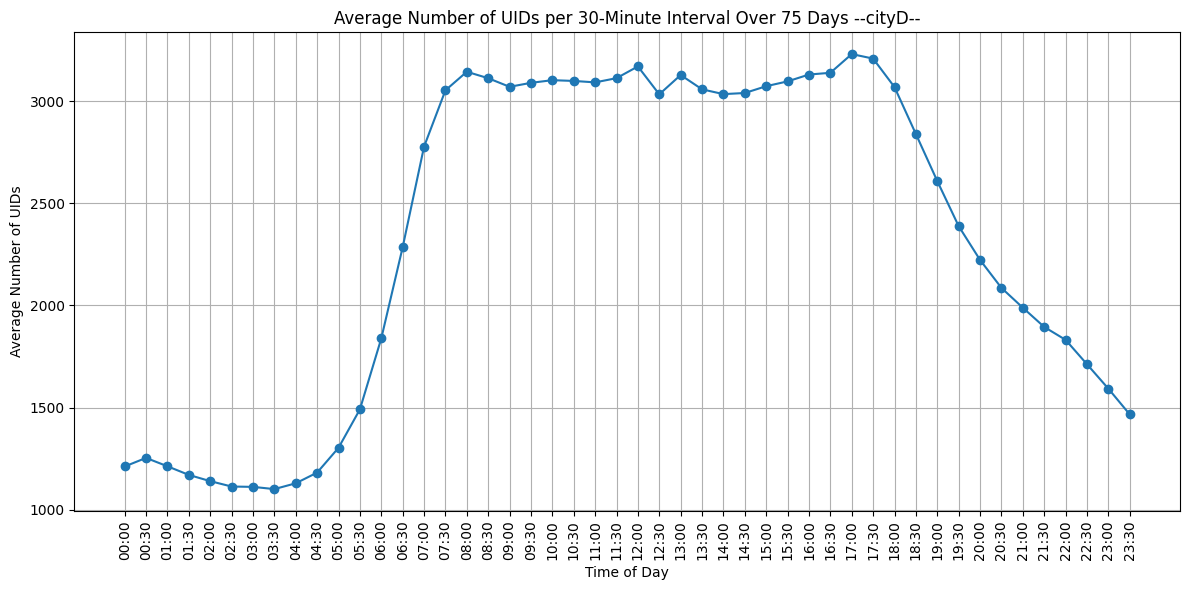

In [3]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd
import polars as pl

def read_gzip_csv(gzip_path):
    """
    gzip形式のCSVファイルを読み込む
    
    :param gzip_path: gzip圧縮されたCSVファイルのパス
    :return: pandasのデータフレーム
    """

    # Daskデータフレームとして読み込む
    # ddf = dd.read_csv(gzip_path, compression='gzip')
    # df= ddf.compute()
    
    with gzip.open(gzip_path, 'rt') as f:
        # df = pd.read_csv(f)
        df = pl.read_csv(f)

    # Pandasデータフレームに変換
    pandas_df = df.to_pandas()
    
    return pandas_df

def visualize_day_activity(df, city_name):
    # 各時間帯ごとのuid数をカウント
    grouped = df.groupby(['d', 't']).uid.nunique().reset_index()
    grouped_avg = grouped.groupby('t').uid.mean().reset_index()
    
    # プロット
    plt.figure(figsize=(12, 6))
    plt.plot(grouped_avg['t'], grouped_avg['uid'], marker='o')
    plt.xticks(range(48), [f'{i//2:02}:{(i%2)*30:02}' for i in range(48)], rotation=90)
    plt.xlabel('Time of Day')
    plt.ylabel('Average Number of UIDs')
    plt.title(f'Average Number of UIDs per 30-Minute Interval Over 75 Days --{city_name}--')
    plt.grid(True)
    plt.tight_layout()

    plt.savefig(f"{city_name}_Average Number of UIDs per 30-Minute Interval Over 75 Days.svg", format='svg')
    
    plt.show()


def visualize_data(city_name):

    if city_name == 'cityA':
        gzip_path = f'HuMob_Data/{city_name}_groundtruthdata.csv.gz'
    else:
        gzip_path = f'HuMob_Data/{city_name}_challengedata.csv.gz'
        
    # データの読み取り
    df = read_gzip_csv(gzip_path)

    # xとyの組み合わせをz列に格納
    # df['z'] = df.apply(lambda row: f"{row['x']}_{row['y']}", axis=1)
    df['z'] = df['x'].astype(str) + '_' + df['y'].astype(str)

    # ユニークユーザ数
    print('ユニークユーザ数：', len(df.uid.unique()))
    
    # ユニーク地点数
    print('ユニーク地点数：', len(df.z.unique()))

    # データフレーム全体のメモリ使用量を表示
    # データフレーム全体のメモリ使用量をバイト単位で取得
    memory_usage_bytes = df.memory_usage(deep=True).sum()
    
    # バイトをギガバイトに変換
    memory_usage_gb = memory_usage_bytes / (1024 ** 3)
    
    print(f'データフレーム全体のメモリ使用量: {memory_usage_gb:.6f} GB')
    
    visualize_day_activity(df, city_name)
    # visualize_allday_activity(df, city_name)
    # visualize_cell_visited(df, city_name)

city_label = ['cityB', 'cityC', 'cityD']

for city_name in city_label:
    visualize_data(city_name)

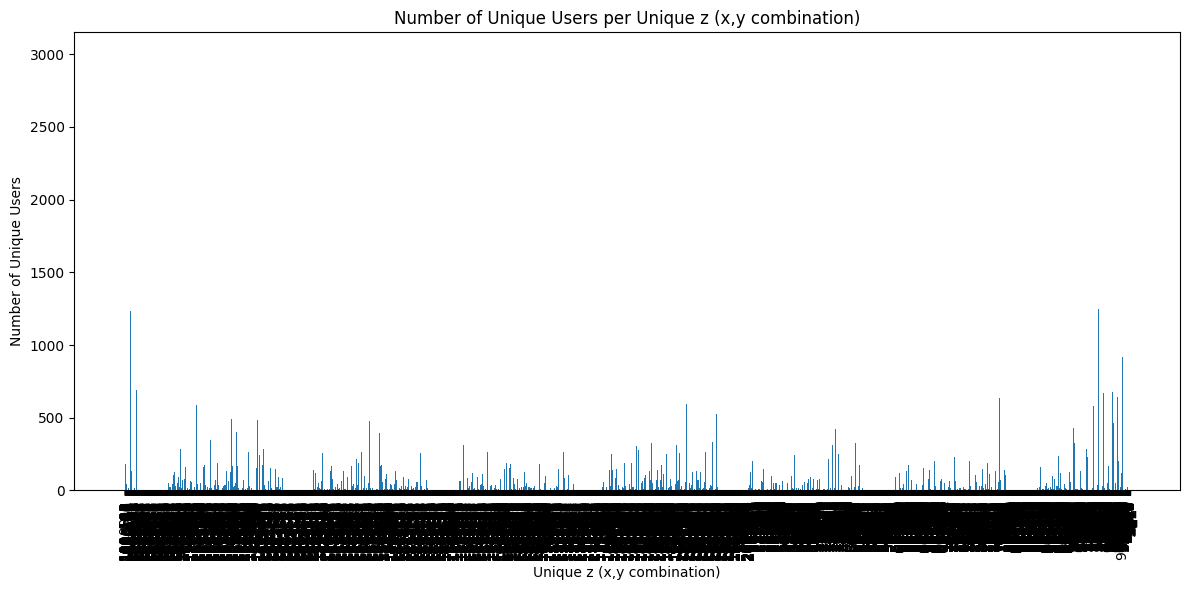

In [8]:
# # xとyの組み合わせをz列に格納
# df['z'] = df.apply(lambda row: f"{row['x']}_{row['y']}", axis=1)

# # ユニークなz列ごとにユニークなユーザ数をカウント
# unique_users_per_z = df.groupby('z').uid.nunique().reset_index()

# # プロット
# plt.figure(figsize=(12, 6))
# plt.bar(unique_users_per_z['z'], unique_users_per_z['uid'])
# plt.xticks(rotation=90)
# plt.xlabel('Unique z (x,y combination)')
# plt.ylabel('Number of Unique Users')
# plt.title('Number of Unique Users per Unique z (x,y combination)')
# plt.tight_layout()
# plt.show()

# モデル検討用データ抽出

In [1]:
import os
import random
import numpy as np
import torch
import tensorflow as tf
from transformers.trainer_utils import set_seed

def set_random_seed(seed: int = 42):
    # Python, NumPy, random モジュール、PyTorch のシードを設定
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    
    # TensorFlow のシードを設定
    tf.random.set_seed(seed)

    # PyTorch 設定（再現性のためにcudnnの設定を固定）
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

2024-09-07 01:35:32.375553: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-07 01:35:32.451805: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-07 01:35:32.468531: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-07 01:35:32.947168: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [1]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import geobleu_main.geobleu

def read_gzip_csv(gzip_path):
    """
    gzip形式のCSVファイルを読み込む
    
    :param gzip_path: gzip圧縮されたCSVファイルのパス
    :return: pandasのデータフレーム
    """

    # Daskデータフレームとして読み込む
    # ddf = dd.read_csv(gzip_path, compression='gzip')
    # df= ddf.compute()
    
    with gzip.open(gzip_path, 'rt') as f:
        # df = pd.read_csv(f)
        df = pl.read_csv(f)

    # Pandasデータフレームに変換
    pandas_df = df.to_pandas()
    
    return pandas_df

# 各uidごとに(d, t, x, y)の形式で値をまとめる関数
def aggregate_uid_data(df):
    uid_agg = df.groupby('uid').apply(lambda group: list(zip(group['d'], group['t'], group['x'], group['y']))).reset_index()
    uid_agg.columns = ['uid', 'data']
    return uid_agg

def complement_data(df):
    # ユーザーID（uid）ごとにデータを処理
    completed_data = []
    df = df.sort_values(by=['uid', 'd', 't'])
    
    for uid, group_uid in df.groupby(['uid']):
        uid = uid if isinstance(uid, int) else uid[0]  # uidを数値として格納
        prev_x = None
        prev_y = None
    
        # uidごとに最小のdを取得
        min_d = group_uid['d'].min()
        
        for d, group_d in group_uid.groupby(['d']):
            d = d if isinstance(d, int) else d[0]  # dを数値として格納
            group_d = group_d.set_index('t')
            min_t = group_d.index.min()  # 最小のt
            max_t = group_d.index.max()  # 最大のt
            
            # 最小のdの場合には最小のtから47になるように、それ以外の場合は0から47になるように補完
            if d == min_d:
                completed_t = list(range(min_t, 48))
            else:
                completed_t = list(range(48))
                
            for t in completed_t:
                if t not in group_d.index:
                    # データが存在しない場合、1つ前のデータをコピー
                    x_value = prev_x
                    y_value = prev_y
                else:
                    x_value = group_d.loc[t, 'x']
                    y_value = group_d.loc[t, 'y']
    
                completed_data.append({'uid': uid, 'd': d, 't': t, 'x': x_value, 'y': y_value})
    
                # 1つ前のデータを更新
                prev_x = x_value
                prev_y = y_value
    
    # 補完されたデータを新しいDataFrameとして作成
    completed_df = pd.DataFrame(completed_data)
    
    # # 全ての列を数値型に変換
    # completed_df = completed_df.apply(pd.to_numeric, errors='coerce')

    # # 欠損値がある行を抽出
    # rows_with_na = completed_df[completed_df.isna().any(axis=1)]
    # display(rows_with_na)
    
    # ユーザーID（uid）、日付（d）、時間（t）で昇順にソート
    sorted_df = completed_df.sort_values(by=['uid', 'd', 't'])
    print(sorted_df.dtypes)
    
    return sorted_df

# 各uidごとに最小のdとその時の最小のtを求める関数
def get_min_d_t(df):
    min_d_t = df.apply(lambda row: min(row['data'], key=lambda x: (x[0], x[1])), axis=1)
    return min_d_t

# 指定されたdとt以降のデータを抽出する関数
def filter_data_by_d_t(df, d, t):
    filtered_data = df.apply(lambda row: [(d_val, t_val, x_val, y_val) for d_val, t_val, x_val, y_val in row['data'] if d_val > d or (d_val == d and t_val >= t)], axis=1)
    return filtered_data

def similar_data_extract(df_A, df_B):
    # geobleu_valとdtw_valの計算および最良uidの抽出
    best_uids = []

    # min_d = df_A['d'].min()
    # min_t = df_A[df_A['d'] == min_d]['t'].min()

    # df_B = df_B[(df_B['d'] > min_d) | ((df_B['d'] == min_d) & (df_B['t'] >= min_t))]

    df_A = aggregate_uid_data(df_A)
    df_B = aggregate_uid_data(df_B)
    display(df_A.head())
    
    for _, row_A in df_A.iterrows():
        best_score = float('-inf')
        best_uid = None
        
        reference = row_A['data']
        min_d = min([d for d, t, x, y in reference])
        min_t = min([t for d, t, x, y in reference if d == min_d])
        
        for _, row_B in df_B.iterrows():
            generated = row_B['data']
            generated = [(d, t, x, y) for d, t, x, y in generated if (d > min_d) or (d == min_d and t >= min_t)]
            
            geobleu_val = geobleu.calc_geobleu(generated, reference, processes=3)
            dtw_val = geobleu.calc_dtw(generated, reference, processes=3)
            
            score = geobleu_val - dtw_val  # geobleu_valは高いほど良く、dtw_valは低いほど良い
            
            if score > best_score:
                best_score = score
                best_uid = row_B['uid']
        
        if best_uid is not None:
            best_uids.append(best_uid)
    
    # 重複を削除してリストにまとめる
    best_uids = list(set(best_uids))

    print(len(best_uids))

    return best_uids
    
def extract_data(city_name):

    if city_name == 'cityA':
        gzip_path = f'HuMob_Data/{city_name}_groundtruthdata.csv.gz'
    else:
        gzip_path = f'HuMob_Data/{city_name}_challengedata.csv.gz'
        
    # データの読み取り
    df = read_gzip_csv(gzip_path)
    display(df.info())

    # x, yの列が999である行を持つuidを特定
    uids_to_exclude = df[(df['x'] == 999) | (df['y'] == 999)]['uid'].unique()

    # 上記のuidを持つデータフレームを作成
    target_df = df[df['uid'].isin(uids_to_exclude)]

    # 上記データの0-59日までのデータを取得
    target_dfs = target_df[(target_df['x'] != 999) | (target_df['y'] != 999)]
    print('うまくデータ取得できているか確認')
    print(len(target_dfs.d.unique()))
    print(len(target_dfs.uid.unique()))
    print(len(df.uid.unique()))
    
    # 上記のuidを避けたデータフレームを作成
    filtered_df = df[~df['uid'].isin(uids_to_exclude)]

    # filtered_dfについて、0-59日までのデータを取得
    filtered_df_v = filtered_df[filtered_df['d'] < 60]

    # 非対象者のデータについて、対象者に近い移動軌跡を持つ人のデータを抽出
    target_dfs = complement_data(target_dfs)
    filtered_df_v = complement_data(filtered_df_v)

    display(target_df.head(30))
    display(target_dfs.head(30))

    # targetに似ているデータを持つuidで基データをフィルタリング
    # uid_list = similar_data_extract(target_df, filtered_df_v)

    # filtered_df = df[df['uid'].isin(uid_list)]

    # print(filtered_df.shape)
    # display(filtered_df.head())

    return target_dfs, filtered_df_v

    
    # # ランダムに500個のuidを取得
    # unique_uids = filtered_df['uid'].unique()
    # random_uids = np.random.choice(unique_uids, min(500, len(unique_uids)), replace=False)
    
    # # 選択されたuidに基づいてデータを抽出
    # sampled_df = filtered_df[filtered_df['uid'].isin(random_uids)]

    # print('サンプルUID数:')
    # print(len(sampled_df['uid'].unique()))

    # print('データが取れているか確認')
    # print(len(sampled_df['d'].unique()))

    # if city_name == 'cityA':
    #     sampled_df.to_csv(f'HuMob_Data/{city_name}_groundtruthdata_500.csv')
    # else:
    #     sampled_df.to_csv(f'HuMob_Data/{city_name}_challengedata_500.csv')

city_label = ['cityD']
for city_name in city_label:
    target_dfs, filtered_df_v = extract_data(city_name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8418135 entries, 0 to 8418134
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   uid     int64
 1   d       int64
 2   t       int64
 3   x       int64
 4   y       int64
dtypes: int64(5)
memory usage: 321.1 MB


None

うまくデータ取得できているか確認
60
3000
6000
uid    int64
d      int64
t      int64
x      int64
y      int64
dtype: object
uid    int64
d      int64
t      int64
x      int64
y      int64
dtype: object


,uid,d,t,x,y
4352478,3000,7,25,192,24
4352479,3000,7,41,193,23
4352480,3000,7,42,192,24
4352481,3000,7,44,193,25
4352482,3000,8,0,193,23
4352483,3000,8,13,196,22
4352484,3000,8,14,196,19
4352485,3000,8,15,196,20
4352486,3000,8,16,196,19
4352487,3000,8,17,196,19


,uid,d,t,x,y
0,3000,7,25,192,24
1,3000,7,26,192,24
2,3000,7,27,192,24
3,3000,7,28,192,24
4,3000,7,29,192,24
5,3000,7,30,192,24
6,3000,7,31,192,24
7,3000,7,32,192,24
8,3000,7,33,192,24
9,3000,7,34,192,24


In [1]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import geobleu_main.geobleu

def read_gzip_csv(gzip_path):
    """
    gzip形式のCSVファイルを読み込む
    
    :param gzip_path: gzip圧縮されたCSVファイルのパス
    :return: pandasのデータフレーム
    """

    # Daskデータフレームとして読み込む
    # ddf = dd.read_csv(gzip_path, compression='gzip')
    # df= ddf.compute()
    
    with gzip.open(gzip_path, 'rt') as f:
        # df = pd.read_csv(f)
        df = pl.read_csv(f)

    # Pandasデータフレームに変換
    pandas_df = df.to_pandas()
    
    return pandas_df

# 各uidごとに(d, t, x, y)の形式で値をまとめる関数
def aggregate_uid_data(df):
    uid_agg = df.groupby('uid').apply(lambda group: list(zip(group['d'], group['t'], group['x'], group['y']))).reset_index()
    uid_agg.columns = ['uid', 'data']
    return uid_agg

def complement_data(df):
    # ユーザーID（uid）ごとにデータを処理
    completed_data = []
    df = df.sort_values(by=['uid', 'd', 't'])
    
    for uid, group_uid in df.groupby(['uid']):
        uid = uid if isinstance(uid, int) else uid[0]  # uidを数値として格納
        prev_x = None
        prev_y = None
    
        # uidごとに最小のdを取得
        min_d = group_uid['d'].min()
        
        for d, group_d in group_uid.groupby(['d']):
            d = d if isinstance(d, int) else d[0]  # dを数値として格納
            group_d = group_d.set_index('t')
            min_t = group_d.index.min()  # 最小のt
            max_t = group_d.index.max()  # 最大のt
            
            # 最小のdの場合には最小のtから47になるように、それ以外の場合は0から47になるように補完
            if d == min_d:
                completed_t = list(range(min_t, 48))
            else:
                completed_t = list(range(48))
                
            for t in completed_t:
                if t not in group_d.index:
                    # データが存在しない場合、1つ前のデータをコピー
                    x_value = prev_x
                    y_value = prev_y
                else:
                    x_value = group_d.loc[t, 'x']
                    y_value = group_d.loc[t, 'y']
    
                completed_data.append({'uid': uid, 'd': d, 't': t, 'x': x_value, 'y': y_value})
    
                # 1つ前のデータを更新
                prev_x = x_value
                prev_y = y_value
    
    # 補完されたデータを新しいDataFrameとして作成
    completed_df = pd.DataFrame(completed_data)
    
    # # 全ての列を数値型に変換
    # completed_df = completed_df.apply(pd.to_numeric, errors='coerce')

    # # 欠損値がある行を抽出
    # rows_with_na = completed_df[completed_df.isna().any(axis=1)]
    # display(rows_with_na)
    
    # ユーザーID（uid）、日付（d）、時間（t）で昇順にソート
    sorted_df = completed_df.sort_values(by=['uid', 'd', 't'])
    print(sorted_df.dtypes)
    
    return sorted_df

# 各uidごとに最小のdとその時の最小のtを求める関数
def get_min_d_t(df):
    min_d_t = df.apply(lambda row: min(row['data'], key=lambda x: (x[0], x[1])), axis=1)
    return min_d_t

# 指定されたdとt以降のデータを抽出する関数
def filter_data_by_d_t(df, d, t):
    filtered_data = df.apply(lambda row: [(d_val, t_val, x_val, y_val) for d_val, t_val, x_val, y_val in row['data'] if d_val > d or (d_val == d and t_val >= t)], axis=1)
    return filtered_data

def similar_data_extract(df_A, df_B):
    # geobleu_valとdtw_valの計算および最良uidの抽出
    best_uids = []

    # min_d = df_A['d'].min()
    # min_t = df_A[df_A['d'] == min_d]['t'].min()

    # df_B = df_B[(df_B['d'] > min_d) | ((df_B['d'] == min_d) & (df_B['t'] >= min_t))]

    df_A = aggregate_uid_data(df_A)
    df_B = aggregate_uid_data(df_B)
    display(df_A.head())
    
    for _, row_A in df_A.iterrows():
        best_score = float('-inf')
        best_uid = None
        
        reference = row_A['data']
        min_d = min([d for d, t, x, y in reference])
        min_t = min([t for d, t, x, y in reference if d == min_d])
        
        for _, row_B in df_B.iterrows():
            generated = row_B['data']
            generated = [(d, t, x, y) for d, t, x, y in generated if (d > min_d) or (d == min_d and t >= min_t)]
            
            geobleu_val = geobleu.calc_geobleu(generated, reference, processes=3)
            dtw_val = geobleu.calc_dtw(generated, reference, processes=3)
            
            score = geobleu_val - dtw_val  # geobleu_valは高いほど良く、dtw_valは低いほど良い
            
            if score > best_score:
                best_score = score
                best_uid = row_B['uid']
        
        if best_uid is not None:
            best_uids.append(best_uid)
    
    # 重複を削除してリストにまとめる
    best_uids = list(set(best_uids))

    print(len(best_uids))

    return best_uids
    
def extract_data(city_name):

    if city_name == 'cityA':
        gzip_path = f'HuMob_Data/{city_name}_groundtruthdata.csv.gz'
    else:
        gzip_path = f'HuMob_Data/{city_name}_challengedata.csv.gz'
        
    # データの読み取り
    df = read_gzip_csv(gzip_path)
    display(df.info())
    display(df.head(10))


city_label = ['cityA']
for city_name in city_label:
    extract_data(city_name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111535175 entries, 0 to 111535174
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   uid     int64
 1   d       int64
 2   t       int64
 3   x       int64
 4   y       int64
dtypes: int64(5)
memory usage: 4.2 GB


None

,uid,d,t,x,y
0,0,0,1,79,86
1,0,0,2,79,86
2,0,0,8,77,86
3,0,0,9,77,86
4,0,0,19,81,89
5,0,0,20,82,88
6,0,0,21,81,89
7,0,0,22,81,89
8,0,0,24,76,86
9,0,0,25,75,82


In [2]:
dd = pd.read_csv('POI/POIdata_cityA.csv')
dd.head()

,x,y,category,POI_count
0,1,1,74,4
1,1,1,48,4
2,1,1,79,2
3,1,1,69,2
4,1,1,73,1


# ランダムに500人のデータを抽出

In [4]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import geobleu_main.geobleu

def read_gzip_csv(gzip_path):
    """
    gzip形式のCSVファイルを読み込む
    
    :param gzip_path: gzip圧縮されたCSVファイルのパス
    :return: pandasのデータフレーム
    """

    # Daskデータフレームとして読み込む
    # ddf = dd.read_csv(gzip_path, compression='gzip')
    # df= ddf.compute()
    
    with gzip.open(gzip_path, 'rt') as f:
        # df = pd.read_csv(f)
        df = pl.read_csv(f)

    # Pandasデータフレームに変換
    pandas_df = df.to_pandas()
    
    return pandas_df

# 各uidごとに(d, t, x, y)の形式で値をまとめる関数
def aggregate_uid_data(df):
    uid_agg = df.groupby('uid').apply(lambda group: list(zip(group['d'], group['t'], group['x'], group['y']))).reset_index()
    uid_agg.columns = ['uid', 'data']
    return uid_agg

def complement_data(df):
    # ユーザーID（uid）ごとにデータを処理
    completed_data = []
    df = df.sort_values(by=['uid', 'd', 't'])
    
    for uid, group_uid in df.groupby(['uid']):
        uid = uid if isinstance(uid, int) else uid[0]  # uidを数値として格納
        prev_x = None
        prev_y = None
    
        # uidごとに最小のdを取得
        min_d = group_uid['d'].min()
        
        for d, group_d in group_uid.groupby(['d']):
            d = d if isinstance(d, int) else d[0]  # dを数値として格納
            group_d = group_d.set_index('t')
            min_t = group_d.index.min()  # 最小のt
            max_t = group_d.index.max()  # 最大のt
            
            # 最小のdの場合には最小のtから47になるように、それ以外の場合は0から47になるように補完
            if d == min_d:
                completed_t = list(range(min_t, 48))
            else:
                completed_t = list(range(48))
                
            for t in completed_t:
                if t not in group_d.index:
                    # データが存在しない場合、1つ前のデータをコピー
                    x_value = prev_x
                    y_value = prev_y
                else:
                    x_value = group_d.loc[t, 'x']
                    y_value = group_d.loc[t, 'y']
    
                completed_data.append({'uid': uid, 'd': d, 't': t, 'x': x_value, 'y': y_value})
    
                # 1つ前のデータを更新
                prev_x = x_value
                prev_y = y_value
    
    # 補完されたデータを新しいDataFrameとして作成
    completed_df = pd.DataFrame(completed_data)
    
    # # 全ての列を数値型に変換
    # completed_df = completed_df.apply(pd.to_numeric, errors='coerce')

    # # 欠損値がある行を抽出
    # rows_with_na = completed_df[completed_df.isna().any(axis=1)]
    # display(rows_with_na)
    
    # ユーザーID（uid）、日付（d）、時間（t）で昇順にソート
    sorted_df = completed_df.sort_values(by=['uid', 'd', 't'])
    print(sorted_df.dtypes)
    
    return sorted_df

# 各uidごとに最小のdとその時の最小のtを求める関数
def get_min_d_t(df):
    min_d_t = df.apply(lambda row: min(row['data'], key=lambda x: (x[0], x[1])), axis=1)
    return min_d_t

# 指定されたdとt以降のデータを抽出する関数
def filter_data_by_d_t(df, d, t):
    filtered_data = df.apply(lambda row: [(d_val, t_val, x_val, y_val) for d_val, t_val, x_val, y_val in row['data'] if d_val > d or (d_val == d and t_val >= t)], axis=1)
    return filtered_data

def similar_data_extract(df_A, df_B):
    # geobleu_valとdtw_valの計算および最良uidの抽出
    best_uids = []

    # min_d = df_A['d'].min()
    # min_t = df_A[df_A['d'] == min_d]['t'].min()

    # df_B = df_B[(df_B['d'] > min_d) | ((df_B['d'] == min_d) & (df_B['t'] >= min_t))]

    df_A = aggregate_uid_data(df_A)
    df_B = aggregate_uid_data(df_B)
    display(df_A.head())
    
    for _, row_A in df_A.iterrows():
        best_score = float('-inf')
        best_uid = None
        
        reference = row_A['data']
        min_d = min([d for d, t, x, y in reference])
        min_t = min([t for d, t, x, y in reference if d == min_d])
        
        for _, row_B in df_B.iterrows():
            generated = row_B['data']
            generated = [(d, t, x, y) for d, t, x, y in generated if (d > min_d) or (d == min_d and t >= min_t)]
            
            geobleu_val = geobleu.calc_geobleu(generated, reference, processes=3)
            dtw_val = geobleu.calc_dtw(generated, reference, processes=3)
            
            score = geobleu_val - dtw_val  # geobleu_valは高いほど良く、dtw_valは低いほど良い
            
            if score > best_score:
                best_score = score
                best_uid = row_B['uid']
        
        if best_uid is not None:
            best_uids.append(best_uid)
    
    # 重複を削除してリストにまとめる
    best_uids = list(set(best_uids))

    print(len(best_uids))

    return best_uids
    
def extract_data(city_name):

    if city_name == 'cityA':
        gzip_path = f'HuMob_Data/{city_name}_groundtruthdata.csv.gz'
    else:
        gzip_path = f'HuMob_Data/{city_name}_challengedata.csv.gz'
        
    # データの読み取り
    df = read_gzip_csv(gzip_path)
    display(df.info())

    # x, yの列が999である行を持つuidを特定
    uids_to_exclude = df[(df['x'] == 999) | (df['y'] == 999)]['uid'].unique()
    
    # 上記のuidを避けたデータフレームを作成
    filtered_df = df[~df['uid'].isin(uids_to_exclude)]
    
    # ランダムに500個のuidを取得
    unique_uids = filtered_df['uid'].unique()
    random_uids = np.random.choice(unique_uids, min(500, len(unique_uids)), replace=False)
    
    # 選択されたuidに基づいてデータを抽出
    sampled_df = filtered_df[filtered_df['uid'].isin(random_uids)]

    print('サンプルUID数:')
    print(len(sampled_df['uid'].unique()))

    print('データが取れているか確認')
    print(len(sampled_df['d'].unique()))

    if city_name == 'cityA':
        sampled_df.to_csv(f'HuMob_Data/{city_name}_groundtruthdata_500.csv')
    else:
        sampled_df.to_csv(f'HuMob_Data/{city_name}_challengedata_500.csv')

city_label = ['cityB', 'cityC']
for city_name in city_label:
    extract_data(city_name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24375898 entries, 0 to 24375897
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   uid     int64
 1   d       int64
 2   t       int64
 3   x       int64
 4   y       int64
dtypes: int64(5)
memory usage: 929.9 MB


None

サンプルUID数:
500
データが取れているか確認
75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18456528 entries, 0 to 18456527
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   uid     int64
 1   d       int64
 2   t       int64
 3   x       int64
 4   y       int64
dtypes: int64(5)
memory usage: 704.1 MB


None

サンプルUID数:
500
データが取れているか確認
75


In [2]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

def read_gzip_csv(gzip_path):
    """
    gzip形式のCSVファイルを読み込む
    
    :param gzip_path: gzip圧縮されたCSVファイルのパス
    :return: pandasのデータフレーム
    """

    # Daskデータフレームとして読み込む
    # ddf = dd.read_csv(gzip_path, compression='gzip')
    # df= ddf.compute()
    
    with gzip.open(gzip_path, 'rt') as f:
        # df = pd.read_csv(f)
        df = pl.read_csv(f)

    # Pandasデータフレームに変換
    pandas_df = df.to_pandas()
    
    return pandas_df
    
def extract_data(city_name):

    if city_name == 'cityA':
        gzip_path = f'HuMob_Data/{city_name}_groundtruthdata.csv.gz'
    else:
        gzip_path = f'HuMob_Data/{city_name}_challengedata.csv.gz'
        
    # データの読み取り
    df = read_gzip_csv(gzip_path)
    display(df.info())

    # x, yの列が999である行を持つuidを特定
    uids_to_exclude = df[(df['x'] == 999) | (df['y'] == 999)]['uid'].unique()

    # 上記のuidを持つデータフレームを作成
    target_df = df[df['uid'].isin(uids_to_exclude)]

    not_target_df = df[~df['uid'].isin(uids_to_exclude)]

    target_df.to_csv(f'HuMob_Data/{city_name}_challengedata_target.csv', index=False)
    print('Targetデータ取得完了')
    not_target_df.to_csv(f'HuMob_Data/{city_name}_challengedata_not_target.csv', index=False)
    print('Not-Targetデータ取得完了')

city_label = ['cityB', 'cityC', 'cityD']
for city_name in city_label:
    print('city_name:', city_name)
    extract_data(city_name)

city_name: cityB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24375898 entries, 0 to 24375897
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   uid     int64
 1   d       int64
 2   t       int64
 3   x       int64
 4   y       int64
dtypes: int64(5)
memory usage: 929.9 MB


None

Targetデータ取得完了
Not-Targetデータ取得完了
city_name: cityC
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18456528 entries, 0 to 18456527
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   uid     int64
 1   d       int64
 2   t       int64
 3   x       int64
 4   y       int64
dtypes: int64(5)
memory usage: 704.1 MB


None

Targetデータ取得完了
Not-Targetデータ取得完了
city_name: cityD
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8418135 entries, 0 to 8418134
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   uid     int64
 1   d       int64
 2   t       int64
 3   x       int64
 4   y       int64
dtypes: int64(5)
memory usage: 321.1 MB


None

Targetデータ取得完了
Not-Targetデータ取得完了


# 抽出したデータの分布確認


In [ ]:
def visualize_csv_data(city_name):

    if city_name == 'cityA':
        file_path = f'HuMob_Data/{city_name}_groundtruthdata_500.csv'
    else:
        file_path = f'HuMob_Data/{city_name}_challengedata_500.csv'
        
    # データの読み取り
    df = pd.read_csv(file_path)

    # xとyの組み合わせをz列に格納
    # df['z'] = df.apply(lambda row: f"{row['x']}_{row['y']}", axis=1)
    df['z'] = df['x'].astype(str) + '_' + df['y'].astype(str)

    # ユニークユーザ数
    print('ユニークユーザ数：', len(df.uid.unique()))
    
    # ユニーク地点数
    print('ユニーク地点数：', len(df.z.unique()))

    # データフレーム全体のメモリ使用量を表示
    # データフレーム全体のメモリ使用量をバイト単位で取得
    memory_usage_bytes = df.memory_usage(deep=True).sum()
    
    # バイトをギガバイトに変換
    memory_usage_gb = memory_usage_bytes / (1024 ** 3)
    
    print(f'データフレーム全体のメモリ使用量: {memory_usage_gb:.6f} GB')
    
    visualize_day_activity(df, city_name)
    visualize_allday_activity(df, city_name)
    visualize_cell_visited(df, city_name)

for city_name in city_label:
    visualize_csv_data(city_name)

In [ ]:
uid d t x y        day_of_week   kind_of_time
0   0 0 0 50         wed            early_am
0   0 1 10 30        wed            am
0   0 3
0   0 8
0   0 24
0   0 30 999 999
0   0 47 999 999


In [1]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

def read_gzip_csv(gzip_path):
    """
    gzip形式のCSVファイルを読み込む
    
    :param gzip_path: gzip圧縮されたCSVファイルのパス
    :return: pandasのデータフレーム
    """

    # Daskデータフレームとして読み込む
    # ddf = dd.read_csv(gzip_path, compression='gzip')
    # df= ddf.compute()
    
    with gzip.open(gzip_path, 'rt') as f:
        # df = pd.read_csv(f)
        df = pl.read_csv(f)

    # Pandasデータフレームに変換
    pandas_df = df.to_pandas()
    
    return pandas_df
    
def extract_data(city_name):

    if city_name == 'cityA':
        gzip_path = f'HuMob_Data/{city_name}_groundtruthdata.csv.gz'
    else:
        gzip_path = f'HuMob_Data/{city_name}_challengedata.csv.gz'
        
    # データの読み取り
    df = read_gzip_csv(gzip_path)

    df.to_csv(f'HuMob_Data/{city_name}_challengedata.csv', index=False)
    print('データ取得完了')

city_label = ['cityB', 'cityC', 'cityD']
for city_name in city_label:
    print('city_name:', city_name)
    extract_data(city_name)

city_name: cityB
データ取得完了
city_name: cityC
データ取得完了
city_name: cityD
データ取得完了
